In [0]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import os
import pickle

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# load fungsi pembantu
import sys
sys.path.append('/content/gdrive/My Drive/COMPUTER VISION/ngodingpython')
from helpers import load_image_directory, plot_graph

In [0]:
class MyModel:
	@staticmethod
	def build(width, height, depth, classes):
		# inisialisasi model dengan konfigurasi
		# "channel last"
		model = Sequential()
		inputShape = (height, width, depth)
		chanDim = -1

		# make sure channel first tetap jalan
		if K.image_data_format() == 'channel_first':
			inputShape = (depth, height, width)
			chanDim = 1

    # model.add(....)
    # model.add(....)
		model.add(tf.keras.layers.Conv2D(70,kernel_size=(3,3),activation='relu',input_shape=inputShape))
		model.add(tf.keras.layers.Conv2D(102,kernel_size=(3,3),activation='relu'))
		model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
		model.add(tf.keras.layers.Flatten())
		model.add(tf.keras.layers.Dense(310,activation='relu'))
		model.add(tf.keras.layers.Dense(150,activation='relu'))
		model.add(tf.keras.layers.Dense(20,activation='relu'))
		model.add(tf.keras.layers.Dense(4,activation='softmax'))

		return model

In [0]:
# Definisikan path dataset dan tempat menyimpan model
BASE = '/content/gdrive/My Drive/COMPUTER VISION/'
dataset = BASE + 'dataset_artis/'
model_path = BASE + 'computer_vision_artis.pkl' # tempat menyimpan model
labelbin = BASE + 'computer_vision_artis_label.pkl'

In [0]:
#  hyperparameter
EPOCHS = 50
INIT_LR = 0.001
BS = 128
IMAGE_DIMS = (28,28,3) # 3 items (W, H, D)

In [0]:
# inisialisasi list data dan label
data, labels = load_image_directory(dataset, IMAGE_DIMS)

In [0]:
# Normalisasi data
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
print("[INFO] data matriks: {:2f}MB".format(
    data.nbytes/ (1024 * 1000.0)))

[INFO] data matriks: 30.612750MB


In [0]:
# binarisasi label
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [0]:
# train-test-split
(trainX, testX, trainY, testY) = train_test_split(data,
    labels, test_size=0.2, random_state=42)

In [0]:
# konstruksi ImageGenerator
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode="nearest")

In [0]:
import tensorflow as tf
# inisialisasi model
print("[INFO] Mengcompile Jaringan")
model = MyModel.build(width=IMAGE_DIMS[1], 
    height=IMAGE_DIMS[0], depth=IMAGE_DIMS[2], 
    classes=len(lb.classes_))
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
    metrics=["accuracy"])

[INFO] Mengcompile Jaringan
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
# latih jaringan
print("[INFO] Melatih Jaringan")
H = model.fit_generator(
    aug.flow(trainX, trainY, batch_size=BS),
    validation_data=(testX, testY),
    steps_per_epoch=len(trainX) // BS,
    epochs=EPOCHS, verbose=0)

[INFO] Melatih Jaringan


In [0]:
# menyimpan model
print("[INFO] Menyimpan Model Kedalam Disk")
model.save(model_path)

[INFO] Menyimpan Model Kedalam Disk


In [0]:
# menyimpan label binary
print("[INFO] Menyimpan Label Binary")
f = open(labelbin, 'wb')
f.write(pickle.dumps(lb))
f.close()

[INFO] Menyimpan Label Binary


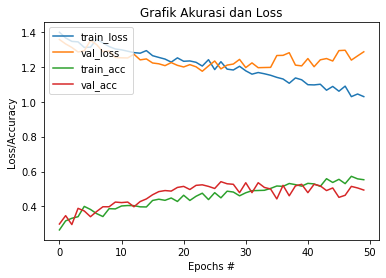

In [0]:
# plot akurasi
plot_graph(H, EPOCHS)

# Test model

In [0]:
# Load Gambar
import matplotlib.image as mpimg
image_test = BASE + 'lucinta_test.jpg'
image_show = mpimg.imread(image_test)
image = load_img(image_test, target_size=(28, 28))

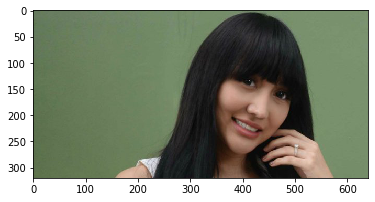

In [0]:
plt.imshow(image_show)

In [0]:
# pra proses
image = np.array(image, dtype="float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

In [0]:
# klasifikasi input
print('[INFO] Mencari Kelas Gambar')
proba = model.predict(image)[0]
idx = np.argmax(proba)
label = lb.classes_[idx]

[INFO] Mencari Kelas Gambar


In [0]:
# prediksi label + confidence score
label = "{}: {:.2f}%".format(label, proba[idx] * 100)
print(label)

lucinta: 40.31%


In [0]:
####

In [0]:
# Load Gambar
import matplotlib.image as mpimg
image_test = BASE + 'raisa_test.jpg'
image_show = mpimg.imread(image_test)
image = load_img(image_test, target_size=(28, 28))

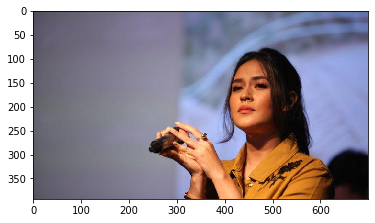

In [0]:
plt.imshow(image_show)

In [0]:
# pra proses
image = np.array(image, dtype="float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

In [0]:
# prediksi label + confidence score
label = "{}: {:.2f}%".format(label, proba[idx] * 100)
print(label)

isyana: 47.92%


In [0]:
####

In [0]:
# Load Gambar
import matplotlib.image as mpimg
image_test = BASE + 'maudy_test.jpg'
image_show = mpimg.imread(image_test)
image = load_img(image_test, target_size=(28, 28))

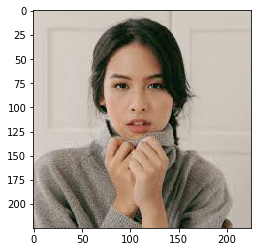

In [0]:
plt.imshow(image_show)

In [0]:
# pra proses
image = np.array(image, dtype="float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

In [0]:
# prediksi label + confidence score
label = "{}: {:.2f}%".format(label, proba[idx] * 100)
print(label)

isyana: 47.92%: 47.92%: 47.92%
